In [1]:
import bnlearn as bn
import pandas as pd
import numpy as np


C:\Users\javie\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\javie\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df=pd.read_csv('../data/hotel_bookings.csv')

In [5]:
dfhot, dfnum = bn.df2onehot(df.sample(frac=0.3,random_state=42))

  3%|▎         | 1/32 [00:00<00:04,  7.48it/s]


[df2onehot] >Auto detecting dtypes.


100%|██████████| 32/32 [00:03<00:00,  9.02it/s]


[df2onehot] >Set dtypes in dataframe..


100%|██████████| 32/32 [00:29<00:00,  1.08it/s]


[df2onehot] >Total onehot features: 1506


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


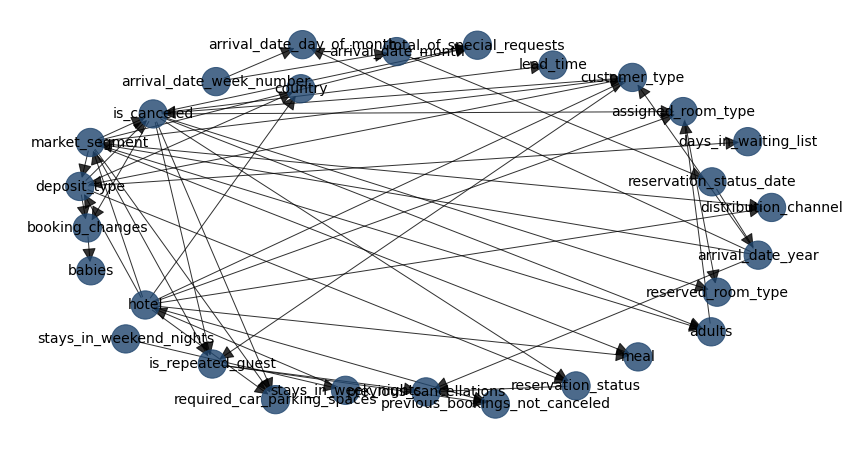

{'pos': {'hotel': array([-0.77442561, -0.44365364]),
  'is_canceled': array([-0.75196664,  0.59487659]),
  'lead_time': array([0.38069999, 0.8607702 ]),
  'arrival_date_year': array([ 0.96218056, -0.17278729]),
  'arrival_date_month': array([-0.06217691,  0.93375251]),
  'arrival_date_week_number': array([-0.57392893,  0.77058131]),
  'arrival_date_day_of_month': array([-0.32902705,  0.97148583]),
  'stays_in_weekend_nights': array([-0.82969486, -0.62815941]),
  'stays_in_week_nights': array([-0.20712227, -0.90744838]),
  'adults': array([ 0.82906053, -0.58952757]),
  'babies': array([-0.92872883, -0.25782724]),
  'meal': array([ 0.62182003, -0.72594139]),
  'country': array([-0.33348852,  0.7319102 ]),
  'market_segment': array([-0.930271  ,  0.43960946]),
  'distribution_channel': array([1.        , 0.08658874]),
  'is_repeated_guest': array([-0.58453081, -0.76468738]),
  'previous_cancellations': array([ 0.02093231, -0.91612949]),
  'previous_bookings_not_canceled': array([ 0.217513

In [20]:
DAG = bn.structure_learning.fit(dfnum)
bn.plot(DAG)

In [36]:
model = bn.parameter_learning.fit(DAG, dfnum,methodtype="bayes")

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
[bnlearn] >CPD of hotel:
+----------------------+-----+--------------------------+
| stays_in_week_nights | ... | stays_in_week_nights(17) |
+----------------------+-----+--------------------------+
| hotel(0)             | ... | 0.36672473867595823      |
+----------------------+-----+--------------------------+
| hotel(1)             | ... | 0.6332752613240418       |
+----------------------+-----+--------------------------+
[bnlearn] >CPD of meal:
+----------------+-----+----------------------+
| hotel          | ... | hotel(1)             |
+----------------+-----+----------------------+
| market_segment | ... | market_segment(7)    |
+----------------+-----+----------------------+
| meal(1)        | ... | 0.8215552379439943   |
+----------------+-----+----------------------+
| meal(2)        | ... | 0.004684770525647131 |
+----------------+-----+---------------------

In [44]:
q1=bn.inference.fit(model,variables=['is_canceled'], evidence={'meal':1,'hotel':1,'market_segment':1})
print(q1)

  0%|          | 0/6 [00:00<?, ?it/s]

[bnlearn] >Variable Elimination..


Eliminating: reservation_status_date: 100%|██████████| 6/6 [00:00<00:00, 94.00it/s]

+----+---------------+----------+
|    |   is_canceled |        p |
+====+===============+==========+
|  0 |             0 | 0.534145 |
+----+---------------+----------+
|  1 |             1 | 0.465855 |
+----+---------------+----------+
+----------------+--------------------+
| is_canceled    |   phi(is_canceled) |
+================+====================+
| is_canceled(0) |             0.5341 |
+----------------+--------------------+
| is_canceled(1) |             0.4659 |
+----------------+--------------------+


In [41]:
bn.print_CPD(model)

CPD of hotel:
+----------------------+-----+--------------------------+
| stays_in_week_nights | ... | stays_in_week_nights(17) |
+----------------------+-----+--------------------------+
| hotel(0)             | ... | 0.36672473867595823      |
+----------------------+-----+--------------------------+
| hotel(1)             | ... | 0.6332752613240418       |
+----------------------+-----+--------------------------+
CPD of meal:
+----------------+-----+----------------------+
| hotel          | ... | hotel(1)             |
+----------------+-----+----------------------+
| market_segment | ... | market_segment(7)    |
+----------------+-----+----------------------+
| meal(1)        | ... | 0.8215552379439943   |
+----------------+-----+----------------------+
| meal(2)        | ... | 0.004684770525647131 |
+----------------+-----+----------------------+
| meal(3)        | ... | 0.1666137314064898   |
+----------------+-----+----------------------+
| meal(4)        | ... | 0.003387856651

In [22]:
from sklearn.feature_selection import SelectKBest

aux=SelectKBest(k=15)
aux.fit_transform(dfnum.drop(['is_canceled'],axis=1),dfnum['is_canceled'])
filter = aux.get_support()
features = np.array(dfnum.drop(['is_canceled'],axis=1).columns)
 

print("Selected best 3:")
print(features[filter])
(dfnum[features[filter]].head())

Selected best 3:
['hotel' 'country' 'distribution_channel' 'is_repeated_guest'
 'previous_cancellations' 'previous_bookings_not_canceled'
 'assigned_room_type' 'booking_changes' 'deposit_type'
 'days_in_waiting_list' 'customer_type' 'required_car_parking_spaces'
 'total_of_special_requests' 'reservation_status'
 'reservation_status_date']


,hotel,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,24,2,0,1,1,6,5,1,1,3,0,1,2,536
1,0,48,4,0,1,1,1,1,1,1,3,0,1,1,26
2,0,8,4,0,1,1,10,3,1,1,4,0,2,2,557
3,0,55,4,0,1,1,1,1,1,1,4,0,1,2,262
4,0,24,4,0,1,1,1,1,1,1,3,0,1,2,668


In [8]:
dfnum.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,118,2,3,44,12,3,13,3,...,6,6,5,1,1,3,0,1,2,536
1,0,1,362,1,6,22,8,1,11,3,...,1,1,1,1,1,3,0,1,1,26
2,0,0,169,2,3,49,20,1,11,4,...,1,10,3,1,1,4,0,2,2,557
3,0,0,2,2,8,3,31,1,2,2,...,1,1,1,1,1,4,0,1,2,262
4,0,0,349,3,1,8,8,3,9,3,...,1,1,1,1,1,3,0,1,2,668


In [ ]:
df=pd.read_csv('../data/hotel_bookings.csv') #cargamos datos
#dfhot, dfnum = bn.df2onehot(df.sample(frac=0.3,random_state=42))

In [25]:
df.columns # veo columnas

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [33]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [32]:
df.notna().sum().sort_values(ascending=True) #compruebo integridad de los datos, elimino company, muy pocos datos, elimino filas con datos restandes de agente country y children

company                             6797
agent                             103050
country                           118902
hotel                             119390
total_of_special_requests         119390
required_car_parking_spaces       119390
adr                               119390
customer_type                     119390
days_in_waiting_list              119390
deposit_type                      119390
booking_changes                   119390
assigned_room_type                119390
reserved_room_type                119390
previous_bookings_not_canceled    119390
previous_cancellations            119390
is_repeated_guest                 119390
distribution_channel              119390
market_segment                    119390
meal                              119390
babies                            119390
children                          119390
adults                            119390
stays_in_week_nights              119390
stays_in_weekend_nights           119390
arrival_date_day

In [ ]:
df.drop(['company'],axis=1,inplace=True)
df['children'].fillna(0,inplace=True)
df["meal"].replace({"Undefined": "SC", }, inplace=True) #las reservas con regimen sin definir las convertimos en reservas sin regimen 
df['country'].fillna('Unkown',inplace=True)
df['agent'].fillna(-1,inplace=True)
filter = (df.children != 0) | (df.adults != 0) | (df.babies != 0)
df=df[filter]

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test=train_test_split(df,test_size=0.2,random_state=42)

In [24]:
dfhot_train, dfnum_train = bn.df2onehot(X_train)
dfhot_test, dfnum_test = bn.df2onehot(X_test)

  0%|          | 0/32 [00:00<?, ?it/s]


[df2onehot] >Auto detecting dtypes.


100%|██████████| 32/32 [00:10<00:00,  3.19it/s]


[df2onehot] >Set dtypes in dataframe..


100%|██████████| 32/32 [00:33<00:00,  1.05s/it]


[df2onehot] >Total onehot features: 1682


  6%|▋         | 2/32 [00:00<00:03,  9.75it/s]


[df2onehot] >Auto detecting dtypes.


100%|██████████| 32/32 [00:02<00:00, 11.59it/s]


[df2onehot] >Set dtypes in dataframe..


100%|██████████| 32/32 [00:24<00:00,  1.33it/s]

[df2onehot] >Total onehot features: 1421
